
=== A1 & A2: Linear Regression (1 Feature: N) on Rainfall ===
Train Metrics: {'MSE': 3004.6487559367247, 'RMSE': np.float64(54.81467646476375), 'MAPE': 0.5952083717707944, 'R2': 0.004425830282330234}
Test Metrics: {'MSE': 3028.1081727566134, 'RMSE': np.float64(55.02824886144037), 'MAPE': 0.5588613484953858, 'R2': -0.005896678372762976}

=== A3: Linear Regression (Multiple Features) on Rainfall ===
Train Metrics: {'MSE': 2898.610446934675, 'RMSE': np.float64(53.838744849175995), 'MAPE': 0.580695705103931, 'R2': 0.03956105240584573}
Test Metrics: {'MSE': 2973.049110541983, 'RMSE': np.float64(54.525673866005384), 'MAPE': 0.5493777359209606, 'R2': 0.012393199212950234}

=== A4 & A5: KMeans Clustering (k=2) ===
Cluster Centers:
 [[ 47.62222222  56.82942943  52.66066066  25.41037928  70.57841244
    6.49298354  77.60380886]
 [ 59.66915888  42.57383178  34.10841121  26.25692518  74.29319171
    6.39633374 183.9433648 ]]
Scores: {'Silhouette': np.float64(0.2952176079235833), 'Calinski-Harabas

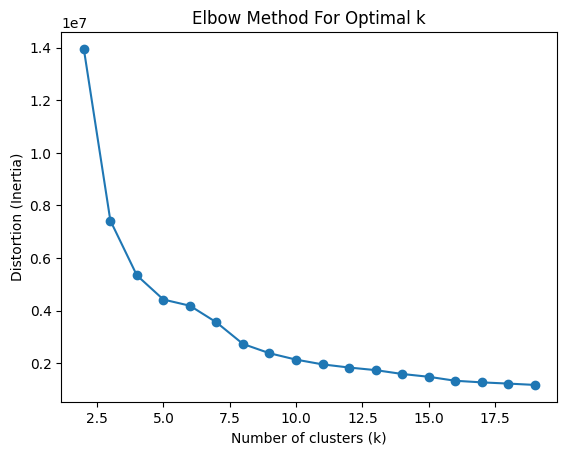

In [5]:
# lab05.py
# ------------------- Import libraries -------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ------------------- A1: Linear Regression (Single Feature) -------------------
def linear_regression_one_feature(dataframe, feature_col, target_col):
    # Select one feature (X) and the target (y)
    X = dataframe[[feature_col]]
    y = dataframe[target_col]

    # Split into train/test sets (80/20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and fit regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return model, (X_train, y_train, y_train_pred), (X_test, y_test, y_test_pred)

# ------------------- A2: Evaluate Regression Model -------------------
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

# ------------------- A3: Linear Regression (Multiple Features) -------------------
def linear_regression_multiple_features(dataframe, target_col, drop_cols=None):
    if drop_cols is None:
        drop_cols = []
    X = dataframe.drop(columns=[target_col] + drop_cols)
    y = dataframe[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return model, (X_train, y_train, y_train_pred), (X_test, y_test, y_test_pred)

# ------------------- A4: KMeans Clustering -------------------
def kmeans_clustering(dataframe, n_clusters):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(dataframe)
    return kmeans, kmeans.labels_, kmeans.cluster_centers_

# ------------------- A5: Evaluate Clustering -------------------
def clustering_scores(dataframe, labels):
    sil = silhouette_score(dataframe, labels)
    ch = calinski_harabasz_score(dataframe, labels)
    db = davies_bouldin_score(dataframe, labels)
    return {"Silhouette": sil, "Calinski-Harabasz": ch, "Davies-Bouldin": db}

# ------------------- A6: Clustering for Multiple k -------------------
def clustering_for_multiple_k(dataframe, k_values):
    results = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(dataframe)
        scores = clustering_scores(dataframe, kmeans.labels_)
        results.append({"k": k, **scores})
    return results

# ------------------- A7: Elbow Method -------------------
def elbow_plot(dataframe, k_range):
    distortions = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(dataframe)
        distortions.append(km.inertia_)
    plt.plot(k_range, distortions, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# ------------------- MAIN PROGRAM -------------------
if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv(r"Crop_recommendation.csv")

    # ========= A1 & A2: One Feature Regression =========
    model_one, train_data_one, test_data_one = linear_regression_one_feature(df, 'N', 'rainfall')
    _, y_train, y_train_pred = train_data_one
    _, y_test, y_test_pred = test_data_one

    # Evaluate Model
    metrics_train_one = evaluate_regression(y_train, y_train_pred)
    metrics_test_one = evaluate_regression(y_test, y_test_pred)

    print("\n=== A1 & A2: Linear Regression (1 Feature: N) on Rainfall ===")
    print("Train Metrics:", metrics_train_one)
    print("Test Metrics:", metrics_test_one)

    # ========= A3: Multiple Features Regression =========
    model_multi, train_data_multi, test_data_multi = linear_regression_multiple_features(df, 'rainfall', drop_cols=['label'])
    _, y_train_m, y_train_pred_m = train_data_multi
    _, y_test_m, y_test_pred_m = test_data_multi

    # Evaluate Model
    metrics_train_multi = evaluate_regression(y_train_m, y_train_pred_m)
    metrics_test_multi = evaluate_regression(y_test_m, y_test_pred_m)

    print("\n=== A3: Linear Regression (Multiple Features) on Rainfall ===")
    print("Train Metrics:", metrics_train_multi)
    print("Test Metrics:", metrics_test_multi)

    # ========= A4 & A5: KMeans Clustering with k=2 =========
    X_cluster = df.drop(columns=['label'])  # removing target label
    kmeans_model, labels, centers = kmeans_clustering(X_cluster, 2)
    cluster_scores_k2 = clustering_scores(X_cluster, labels)

    print("\n=== A4 & A5: KMeans Clustering (k=2) ===")
    print("Cluster Centers:\n", centers)
    print("Scores:", cluster_scores_k2)

    # ========= A6: Scores for multiple k =========
    k_values = range(2, 10)
    clustering_results = clustering_for_multiple_k(X_cluster, k_values)

    print("\n=== A6: Clustering Scores for multiple k ===")
    for res in clustering_results:
        print(res)

    # ========= A7: Elbow Method =========
    print("\n=== A7: Elbow Plot ===")
    elbow_plot(X_cluster, range(2, 20))